# MLP Backpropagation

## Team members:
1. Project Manager - Aruzhan Satybaldiyeva
2. Technical writer - Aruzhan Satybaldiyeva
3. Author of executable content - Aruzhan Satybaldiyeva
4. Designer of interactive plots - Aruzhan Satybaldiyeva
5. Designer of quizzes - Aruzhan Satybaldiyeva

Introduction: Multi-Layer Perceptrons (MLPs) and Backpropagation
Multi-Layer Perceptrons (MLPs)
A Multi-Layer Perceptron (MLP) is a type of artificial neural network, foundational in the field of deep learning. At its core, an MLP is a collection of neurons arranged in layers, through which data flows, transforms, and ultimately produces output. These layers are generally of three types: an input layer, one or more hidden layers, and an output layer. Each neuron in a layer connects to every neuron in the next layer, forming a dense network.

The strength of these connections is defined by weights, and each neuron has an associated bias. The neuron applies an activation function to the weighted sum of its inputs and its bias, which introduces non-linearity into the network. This non-linearity is crucial, as it allows MLPs to learn and model complex patterns in data.

Backpropagation Algorithm
Backpropagation, short for "backward propagation of errors," is a fundamental algorithm in training MLPs. It's used for effectively training the network by updating its weights and biases. The essence of backpropagation is a two-step process: the forward pass and the backward pass.

Forward Pass: In this phase, input data is fed into the network, passing through each layer. The output of each layer is the input for the next, culminating in the final output. This output is compared against the desired output, and the difference is quantified using a cost function.

Backward Pass: This is where backpropagation truly shines. The algorithm computes the gradient of the cost function with respect to each weight and bias by applying the chain rule of calculus, moving backward through the network (hence the name). This gradient tells us how much a small change in each weight and bias would affect the cost function.

Weight Update: Using this gradient, the weights and biases are adjusted, typically with a simple algorithm like gradient descent. The goal is to minimize the cost function, which ideally leads to the network learning the mapping from inputs to correct outputs.

The power of backpropagation lies in its ability to efficiently compute these gradients, even in large and deep networks. This efficiency stems from the way it reuses computations while applying the chain rule, reducing what could be an exponential number of calculations to a manageable number.

In [4]:
import numpy as np

class MLP:
    def __init__(self, layer_sizes):
        self.layer_sizes = layer_sizes
        self.weights = [np.random.randn(y, x) for x, y in zip(layer_sizes[:-1], layer_sizes[1:])]
        self.biases = [np.random.randn(y, 1) for y in layer_sizes[1:]]

    def forward_pass(self, x):
        activation = x
        activations = [x]  # list to store all the activations, layer by layer
        zs = []  # list to store all the z vectors, layer by layer

        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation) + b
            zs.append(z)
            activation = self.sigmoid(z)
            activations.append(activation)

        return activations, zs

    def backward_pass(self, x, y, activations, zs):
        delta = self.cost_derivative(activations[-1], y) * self.sigmoid_prime(zs[-1])
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]

        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())

        for l in range(2, len(self.layer_sizes)):
            z = zs[-l]
            sp = self.sigmoid_prime(z)
            delta = np.dot(self.weights[-l + 1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l - 1].transpose())

        return nabla_b, nabla_w

    def update_mini_batch(self, mini_batch, eta):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]

        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backward_pass(x, y, *self.forward_pass(x))
            nabla_b = [nb + dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw + dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]

        self.weights = [w - (eta / len(mini_batch)) * nw for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b - (eta / len(mini_batch)) * nb for b, nb in zip(self.biases, nabla_b)]

    def sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))

    def sigmoid_prime(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))

    def cost_derivative(self, output_activations, y):
        return (output_activations - y)

# Example of how to initialize and train the MLP
# Create a MLP with 2 neurons in input layer, 3 in hidden layer, and 1 in output layer
mlp = MLP([2, 3, 1])

# Example training data (XOR problem)
training_data = [ (np.array([[0], [0]]), np.array([[0]])),
                  (np.array([[0], [1]]), np.array([[1]])),
                  (np.array([[1], [0]]), np.array([[1]])),
                  (np.array([[1], [1]]), np.array([[0]])) ]

# Training the network
epochs = 1000
mini_batch_size = 1
eta = 0.1  # learning rate


1. MLP Class Definition
__init__: Initializes the network with random weights and biases.
forward_pass: Performs the forward pass of the network.
backward_pass: Executes the backpropagation algorithm.
update_mini_batch: Updates the network's weights and biases based on a mini-batch of data.
sigmoid: The sigmoid activation function.
sigmoid_prime: Derivative of the sigmoid function.
cost_derivative: Derivative of the cost function.
2. Training the MLP
The network is instantiated with 2 input neurons, 3 hidden layer neurons, and 1 output neuron, suitable for simple problems like the XOR.
Training data for the XOR problem is defined.
The network is trained over several epochs using stochastic gradient descent.

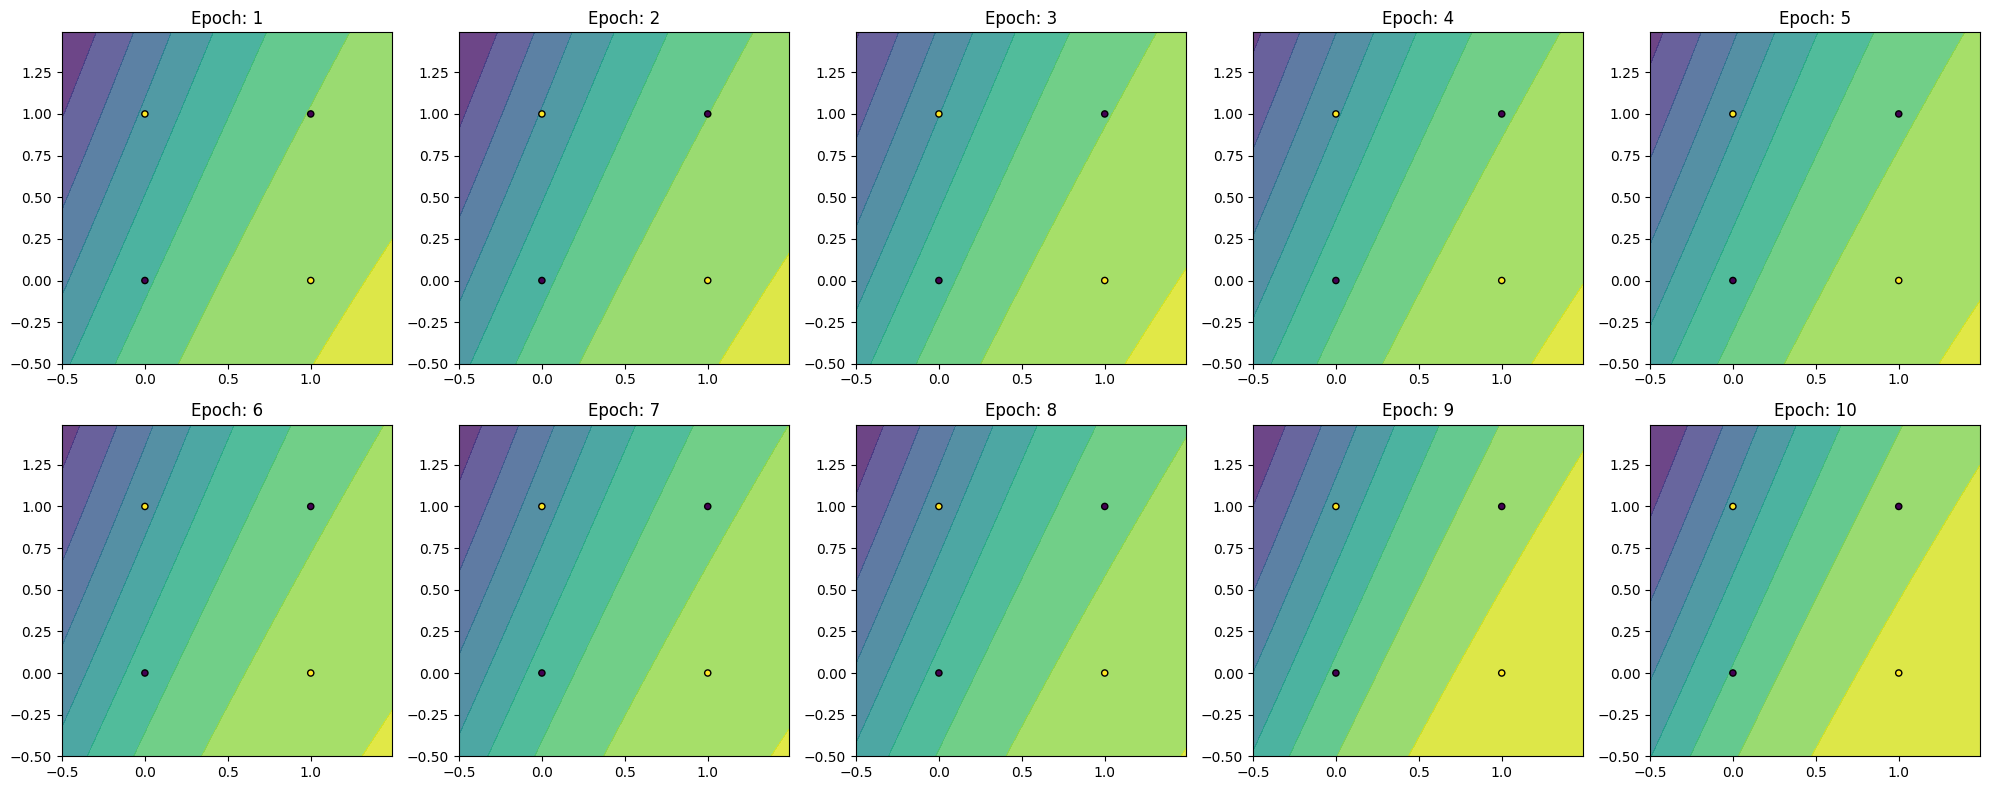

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Training data for XOR problem
xor_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_output = np.array([0, 1, 1, 0])

# Function to visualize the training process
def plot_xor_solution(mlp, epoch, ax):
    # Generate a meshgrid to visualize the decision boundary
    x_min, x_max = xor_input[:, 0].min() - 0.5, xor_input[:, 0].max() + 0.5
    y_min, y_max = xor_input[:, 1].min() - 0.5, xor_input[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict over the meshgrid
    Z = np.array([mlp.forward_pass(np.array([[x], [y]]))[0][-1] for x, y in zip(np.ravel(xx), np.ravel(yy))])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(xor_input[:, 0], xor_input[:, 1], c=xor_output, edgecolors='k', s=20)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(f"Epoch: {epoch}")

# Training the MLP for visualization
epochs = 10
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

for i in range(epochs):
    np.random.shuffle(training_data)
    mini_batches = [training_data[k:k + mini_batch_size] for k in range(0, len(training_data), mini_batch_size)]
    for mini_batch in mini_batches:
        mlp.update_mini_batch(mini_batch, eta)
    plot_xor_solution(mlp, i + 1, axes[i])

plt.tight_layout()
plt.show()


Here is a visualization showing how backpropagation influences the solution of the XOR problem over different epochs during the training process of an MLP:

Each subplot represents the decision boundary of the MLP after a certain number of training epochs.
The decision boundary is the region in the plot where the output of the MLP switches from one class to the other.
The colored background shows the output of the MLP for different points in the input space. The change in colors indicates how the MLP's output varies across the space.
The points represent the XOR training data: (0,0) and (1,1) are one class (colored as one color), and (0,1) and (1,0) are another class (colored differently).
As the epochs progress, you can observe how the decision boundary evolves, showing the learning process of the MLP. Initially, the boundary might not correctly separate the classes, but with more training (backpropagation), it adjusts to correctly classify the XOR data.
This visualization demonstrates the capability of an MLP trained with backpropagation to learn non-linear relationships, as required for solving the XOR problem.

The Iris Flower Classification Problem
This problem involves classifying iris flowers into one of three species (Setosa, Versicolor, or Virginica) based on four features: sepal length, sepal width, petal length, and petal width. It's a multiclass classification problem, well-suited for demonstrating the capabilities of an MLP.

Approach
Data Preparation: Load the Iris dataset and split it into features (X) and labels (y). The dataset needs to be split into a training set and a testing set.

MLP Configuration: For this problem, an MLP with an input layer of 4 neurons (corresponding to the 4 features), one or more hidden layers, and an output layer with 3 neurons (corresponding to the 3 species) can be used.

Training: Train the MLP using backpropagation and gradient descent. This involves iteratively adjusting the weights and biases based on the error between the predicted and actual classifications.

Evaluation: After training, evaluate the model on the testing set to determine its accuracy.

In [8]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# One-hot encoding for the output
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a MLP with 4 input neurons (features), 2 hidden layers with 5 neurons each, and 3 output neurons (classes)
mlp_iris = MLP([4, 5, 5, 3])

# Training the network on Iris dataset
epochs = 200
mini_batch_size = 10
eta = 0.1  # learning rate

# Correcting the mini-batch preparation and training process
for epoch in range(epochs):
    # Creating mini-batches
    permutation = np.random.permutation(X_train_scaled.shape[0])
    X_train_shuffled = X_train_scaled[permutation]
    y_train_shuffled = y_train[permutation]

    mini_batches = [(X_train_shuffled[k:k + mini_batch_size], y_train_shuffled[k:k + mini_batch_size])
                    for k in range(0, X_train_scaled.shape[0], mini_batch_size)]

    for X_mini, y_mini in mini_batches:
        X_mini = np.array(X_mini).reshape(-1, 4, 1)
        y_mini = np.array(y_mini).reshape(-1, 3, 1)
        mlp_iris.update_mini_batch(list(zip(X_mini, y_mini)), eta)

# Defining the predict function for evaluating the model
def predict(mlp, X):
    return np.array([np.argmax(mlp.forward_pass(x)[0][-1]) for x in X])

# Evaluate the model again
y_pred = predict(mlp_iris, [x.reshape(-1, 1) for x in X_test_scaled])
y_true = np.array([np.argmax(y) for y in y_test])

accuracy = accuracy_score(y_true, y_pred)
accuracy



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.8666666666666667

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


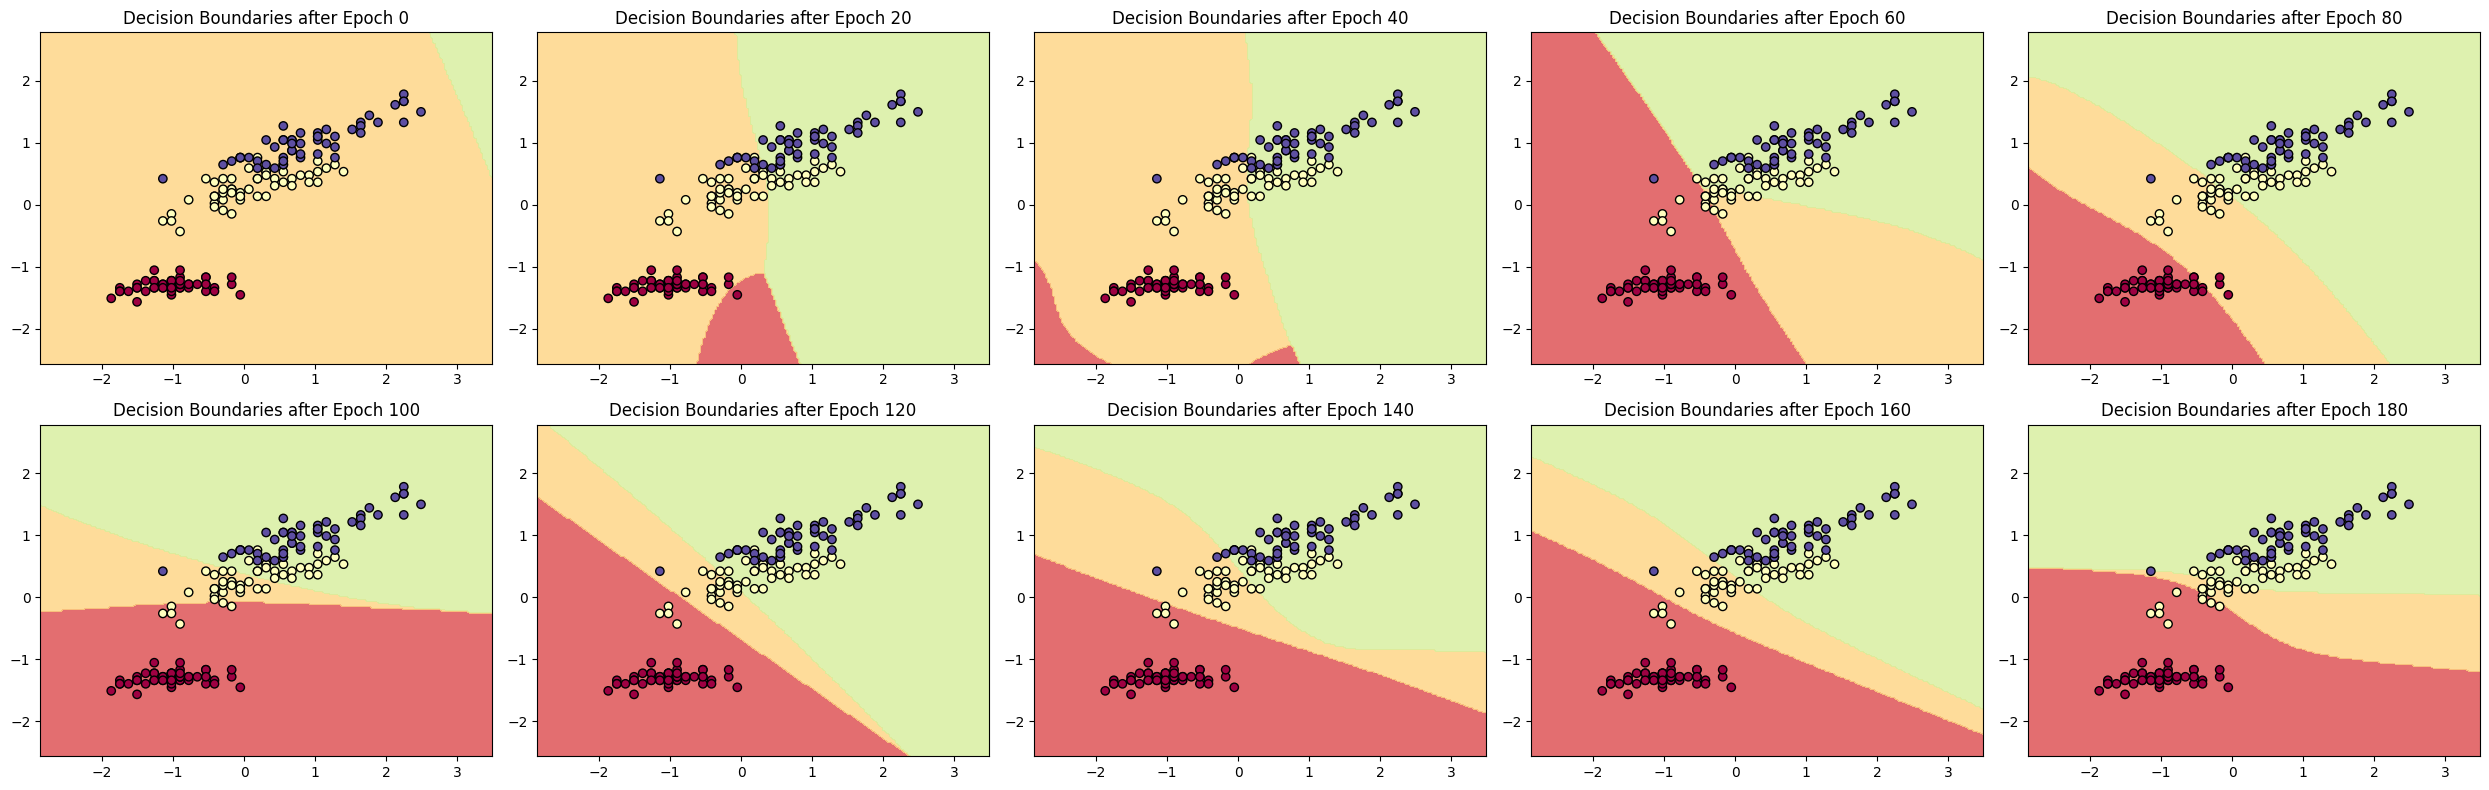

In [16]:
# Selecting two features from the Iris dataset for visualization
# Features chosen: Sepal Length and Petal Length (first and third features)
X_vis = X[:, [0, 2]]
y_vis = iris.target

# Standardize the dataset
X_vis_scaled = scaler.fit_transform(X_vis)

# Splitting the dataset for training and testing
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis_scaled, y_vis, test_size=0.3, random_state=42)

# One-hot encoding for the output
y_train_vis_encoded = encoder.fit_transform(y_train_vis.reshape(-1, 1))
y_test_vis_encoded = encoder.transform(y_test_vis.reshape(-1, 1))

# Creating a new MLP for the 2-feature dataset
mlp_vis = MLP([2, 5, 5, 3])  # 2 input neurons, 2 hidden layers with 5 neurons each, 3 output neurons

# Function to visualize the decision boundaries for the Iris dataset
def plot_decision_boundaries(mlp, X, y, ax, title):
    # Generate a meshgrid to visualize the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

    # Predict over the meshgrid
    Z = predict(mlp, np.c_[xx.ravel(), yy.ravel()].reshape(-1, 2, 1))
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    ax.contourf(xx, yy, Z, alpha=0.8, levels=np.arange(-1, 4), cmap=plt.cm.Spectral)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Spectral)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)


fig, axes = plt.subplots(2, 5, figsize=(25, 8))
axes = axes.ravel()

for plot_index, epoch in enumerate(range(0, epochs, 20)):
    # Reinitialize the MLP for each set of epochs
    mlp_vis = MLP([2, 5, 5, 3])

    for e in range(epoch):
        permutation = np.random.permutation(X_train_vis.shape[0])
        X_train_vis_shuffled = X_train_vis[permutation]
        y_train_vis_shuffled = y_train_vis_encoded[permutation]

        mini_batches = [(X_train_vis_shuffled[k:k + mini_batch_size], y_train_vis_shuffled[k:k + mini_batch_size])
                        for k in range(0, X_train_vis.shape[0], mini_batch_size)]

        for X_mini, y_mini in mini_batches:
            X_mini = np.array(X_mini).reshape(-1, 2, 1)
            y_mini = np.array(y_mini).reshape(-1, 3, 1)
            mlp_vis.update_mini_batch(list(zip(X_mini, y_mini)), eta)

    # Plotting the decision boundaries for each set of 20 epochs
    plot_decision_boundaries(mlp_vis, X_vis_scaled, y_vis, axes[plot_index], f"Decision Boundaries after Epoch {epoch}")

plt.tight_layout()
plt.show()